In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
import seaborn as sns
import math
warnings.filterwarnings('ignore')

#reading the csv file
file = pd.read_csv("/Users/admin/Documents/Manipal/MRM/Week-3-Project/Country-data.csv")
tester = pd.read_csv("/Users/admin/Documents/Manipal/MRM/Week-3-Project/Country-data.csv")
file.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Text(0.5, 1.0, 'Visualization of data')

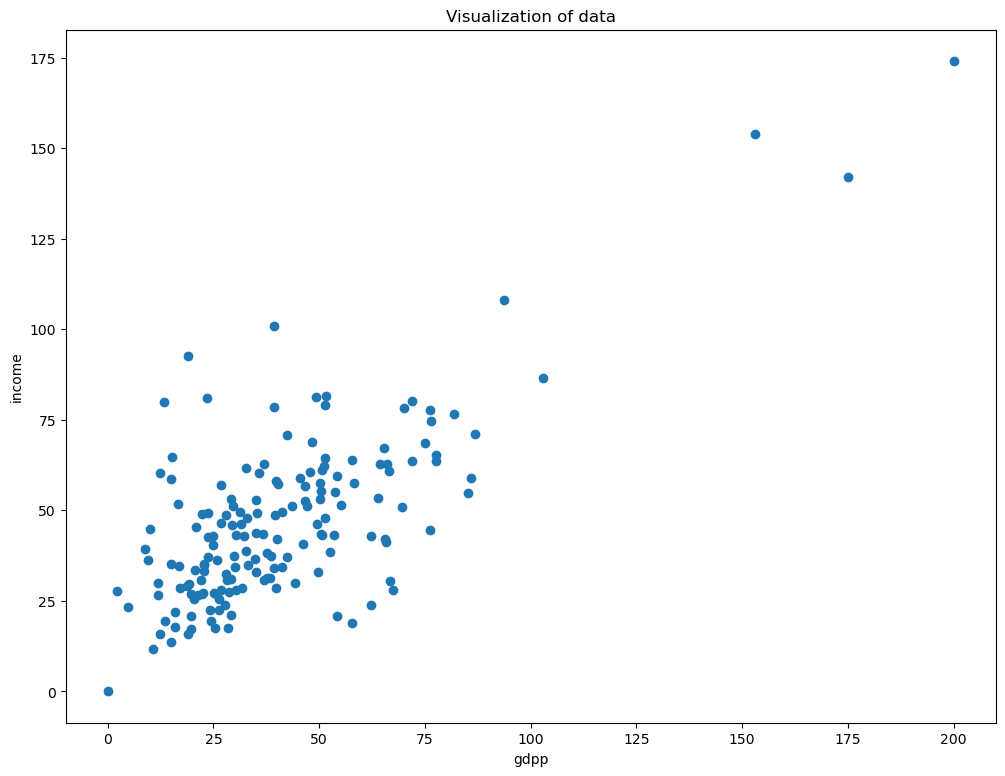

In [2]:
plt.figure(figsize =(12,9))
plt.scatter(file.iloc[:,2], file.iloc[:,4])
plt.xlabel('gdpp')
plt.ylabel('income')
plt.title("Visualization of data")

In [3]:
country = file.pop('country')

In [4]:
#standardization
file = (file - np.mean(file)) / (np.std(file))
file.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [5]:
file.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [6]:
# compute the covariance matrix
X = np.matrix(file)
cov = (X.T * X) / X.shape[0]

In [7]:
#eigen values & eigen vectors
# finding eigenvalues and eigenvectors
eigenvalue, eigenvector= np.linalg.eig(cov)
print("Eigen values: ",eigenvalue)
print("Eigen vectors : ",eigenvector)


Eigen values:  [4.13565658 1.54634631 1.1703833  0.99478456 0.66061903 0.22358112
 0.06687501 0.08831536 0.11343874]
Eigen vectors :  [[-0.41951945  0.19288394 -0.02954353  0.37065326  0.16896968  0.20062815
   0.3275418   0.68274306 -0.07948854]
 [ 0.28389698  0.61316349  0.14476069  0.00309102 -0.05761584 -0.05933283
  -0.12308207  0.01419742 -0.70730269]
 [ 0.15083782 -0.24308678 -0.59663237  0.4618975  -0.51800037  0.00727646
   0.11308797 -0.07249683 -0.24983051]
 [ 0.16148244  0.67182064 -0.29992674 -0.07190746 -0.25537642 -0.03003154
   0.09903717  0.02894642  0.59218953]
 [ 0.39844111  0.02253553  0.3015475   0.39215904  0.2471496   0.16034699
   0.61298247 -0.35262369  0.09556237]
 [-0.19317293 -0.00840447  0.64251951  0.15044176 -0.7148691   0.06628537
  -0.02523614  0.01153775  0.10463252]
 [ 0.42583938 -0.22270674  0.11391854 -0.20379723 -0.1082198  -0.60112652
   0.29403981  0.50466425  0.01848639]
 [-0.40372896  0.15523311  0.01954925  0.37830365  0.13526221 -0.75068875
 

In [8]:
# Sort the eigenvalues in descending order
sorted_idx = eigenvalue.argsort()[::-1]
sorted_eigenvalues = eigenvalue[sorted_idx]
sorted_eigenvectors = eigenvector[:, sorted_idx]

In [9]:
# Calculate the proportion of variance explained by each principal component
variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
percent_variance = 100 * variance

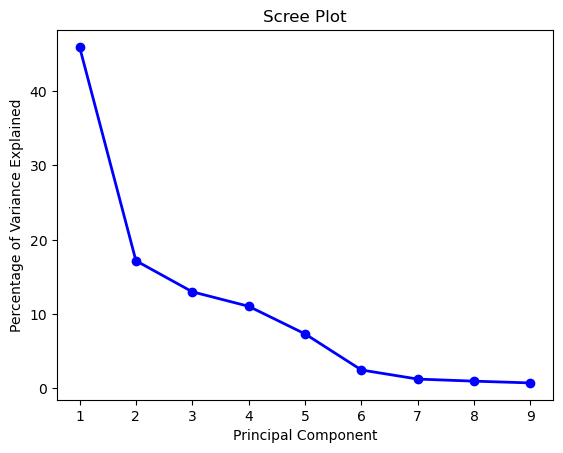

In [10]:
# Plot the scree plot
plt.plot(range(1, len(percent_variance)+1), percent_variance, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.title('Scree Plot')
plt.show()

In [11]:
cov.shape

(9, 9)

In [12]:
#first 3 contain most information
#therefore 3 PCs must be considered

In [13]:
pc1 = file.dot(sorted_eigenvectors.T[0].reshape(-1,1))
pc2 = file.dot(sorted_eigenvectors.T[1].reshape(-1,1))
pc3 = file.dot(sorted_eigenvectors.T[2].reshape(-1,1))
res3d = pd.DataFrame(pc1, columns=['PC1'])
res3d['PC2'] = pc2
res3d['PC3'] = pc3
res3d['Y'] = country
res3d = res3d.head(500)

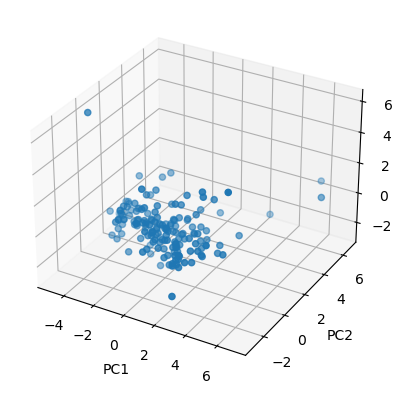

In [14]:
# Plot the first three PCs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc1, pc2, pc3)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


In [15]:
# point clouds (assuming shape Nx3)
pc1 = np.array(pc1)
pc2 = np.array(pc2)
pc3 = np.array(pc3)

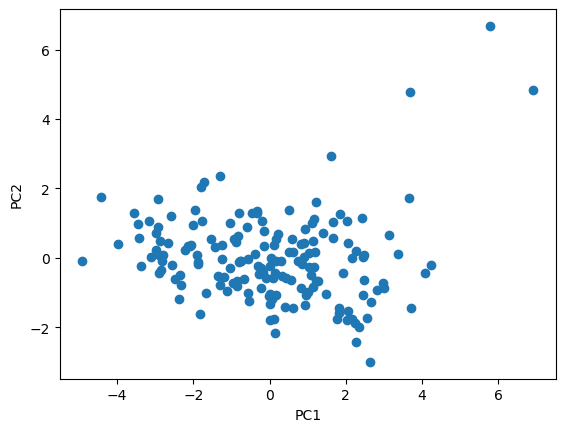

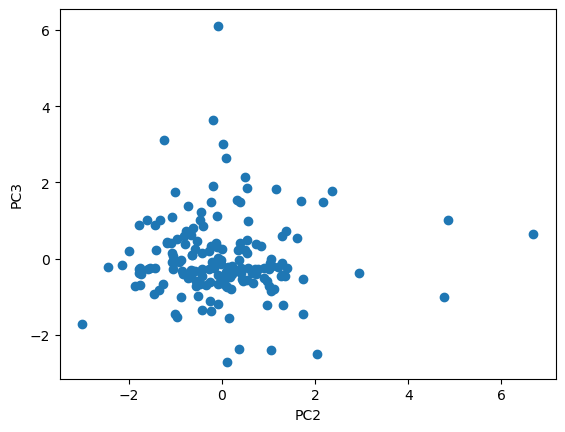

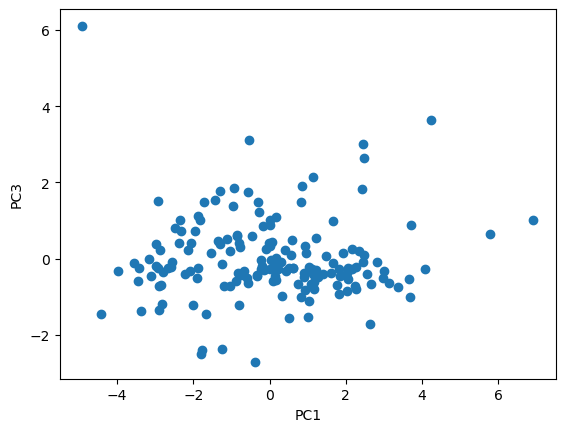

In [16]:
# Plot the first 2 PCs
fig = plt.figure()
plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Plot the next 2 PCs
fig = plt.figure()
plt.scatter(pc2, pc3)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

# Plot the last 2 PCs
fig = plt.figure()
plt.scatter(pc1, pc3)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

In [17]:
PCs = sorted_eigenvectors[:, :3]

In [18]:
PCs

matrix([[-0.41951945,  0.19288394, -0.02954353],
        [ 0.28389698,  0.61316349,  0.14476069],
        [ 0.15083782, -0.24308678, -0.59663237],
        [ 0.16148244,  0.67182064, -0.29992674],
        [ 0.39844111,  0.02253553,  0.3015475 ],
        [-0.19317293, -0.00840447,  0.64251951],
        [ 0.42583938, -0.22270674,  0.11391854],
        [-0.40372896,  0.15523311,  0.01954925],
        [ 0.39264482, -0.0460224 ,  0.12297749]])

In [19]:
features = PCs

In [20]:
result = np.dot(features.T,file.T)

In [21]:
#result = result.T

In [22]:
result

matrix([[-2.91302459e+00,  4.29911330e-01, -2.85225077e-01,
         -2.93242265e+00,  1.03357587e+00,  2.24072616e-02,
         -1.01583737e-01,  2.34216461e+00,  2.97376366e+00,
         -1.81486997e-01,  1.26874386e+00,  1.67099640e+00,
         -1.12385093e+00,  1.08137420e+00,  5.80025152e-01,
          3.14378596e+00,  2.11255447e-01, -2.67231388e+00,
         -1.56570962e-01, -7.93851561e-01,  9.95867143e-01,
         -8.82087639e-01,  1.40781361e-01,  2.46008609e+00,
          9.06594515e-01, -3.12205344e+00, -2.89897068e+00,
         -5.82411867e-01, -2.80790857e+00,  2.54363055e+00,
         -1.55801452e-01, -3.96496402e+00, -3.55755520e+00,
          9.51656055e-01,  5.74819803e-02,  1.21146120e-01,
         -2.09355643e+00, -3.17337012e+00, -1.72567641e+00,
          9.37826615e-01, -2.58170623e+00,  1.14886344e+00,
          2.17445492e+00,  2.05326329e+00,  3.01049182e+00,
         -2.31102923e-01,  9.61833240e-03, -8.48186699e-01,
          8.18678445e-02, -1.29342284e+0

In [23]:
result.shape

(3, 167)

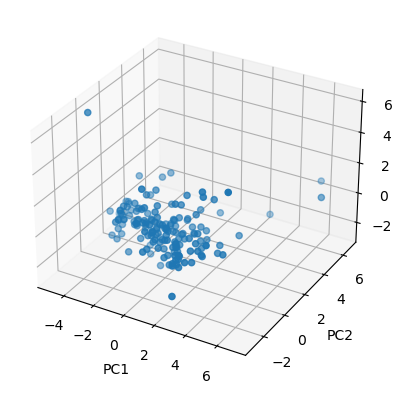

In [24]:
# Plot the first three PCs
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result[0], result[1], result[2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


In [25]:
def kmeans(data, k, max_iterations=100):
    # Initialize centroids randomly
    centroids = np.random.uniform(low=data.min(), high=data.max(), size=(k, data.shape[1]))

    for i in range(max_iterations):
        # Assign each data point to its nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        cluster_ids = np.argmin(distances, axis=1)

        # Update the centroids to the mean of their assigned data points
        for j in range(k):
            centroids[j] = np.mean(data[cluster_ids == j], axis=0)

    return cluster_ids, centroids

In [26]:
cluster_ids, centroids = kmeans(result.T, k=5)

ValueError: shape too large to be a matrix.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X[:, 0], X[:, 1])
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].set_title('Original Data')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1])
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title('PCA Projection')
plt.show()